# JPK AFM data analysis for liquid samples

## Import libraries
Run this ONLY ONCE. Always restart kernel before running.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import sys
import os
from datetime import datetime
from PyQt5.QtWidgets import QApplication, QFileDialog, QListView, QTreeView, QAbstractItemView
#from IPython.display import Image
import matplotlib.pyplot as plt
import wetting, surfevol

app = QApplication(sys.argv)
plt.close('all')

#function to select multiple folders from dialog
def get_directories(caption=""):
    file_dialog = QFileDialog(caption=caption)
    file_dialog.setFileMode(QFileDialog.DirectoryOnly)
    file_dialog.setOption(QFileDialog.DontUseNativeDialog, True)
    file_view = file_dialog.findChild(QListView, 'listView')

    if file_view:
        file_view.setSelectionMode(QAbstractItemView.MultiSelection)
    f_tree_view = file_dialog.findChild(QTreeView)
    if f_tree_view:
        f_tree_view.setSelectionMode(QAbstractItemView.MultiSelection)

    if file_dialog.exec():
        paths = file_dialog.selectedFiles()
    else:
        paths = []

    return paths

## Surface Evolver simulation data files

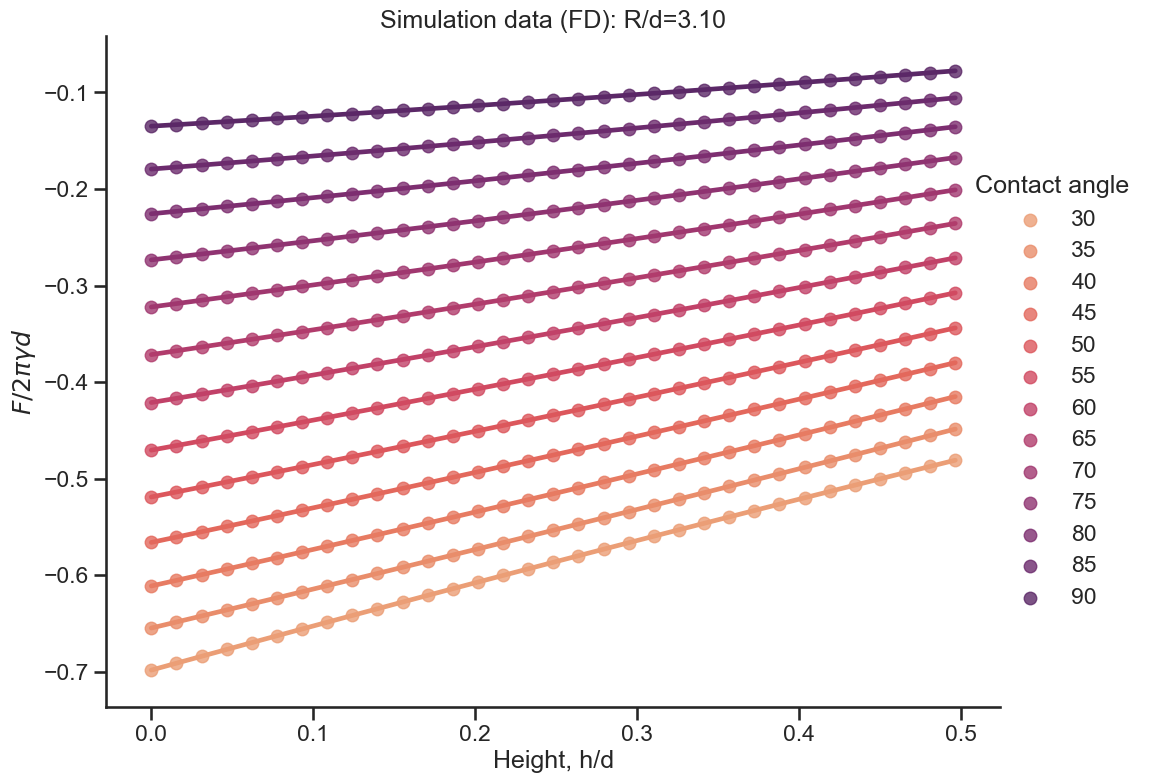

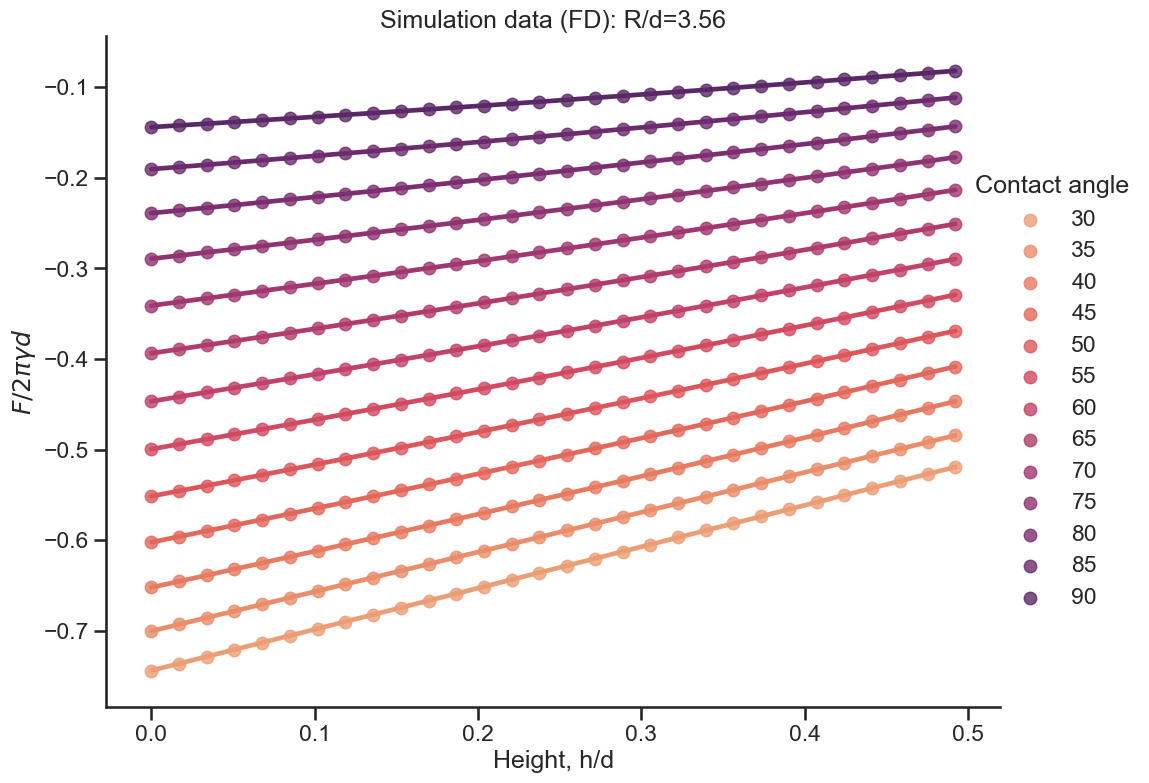

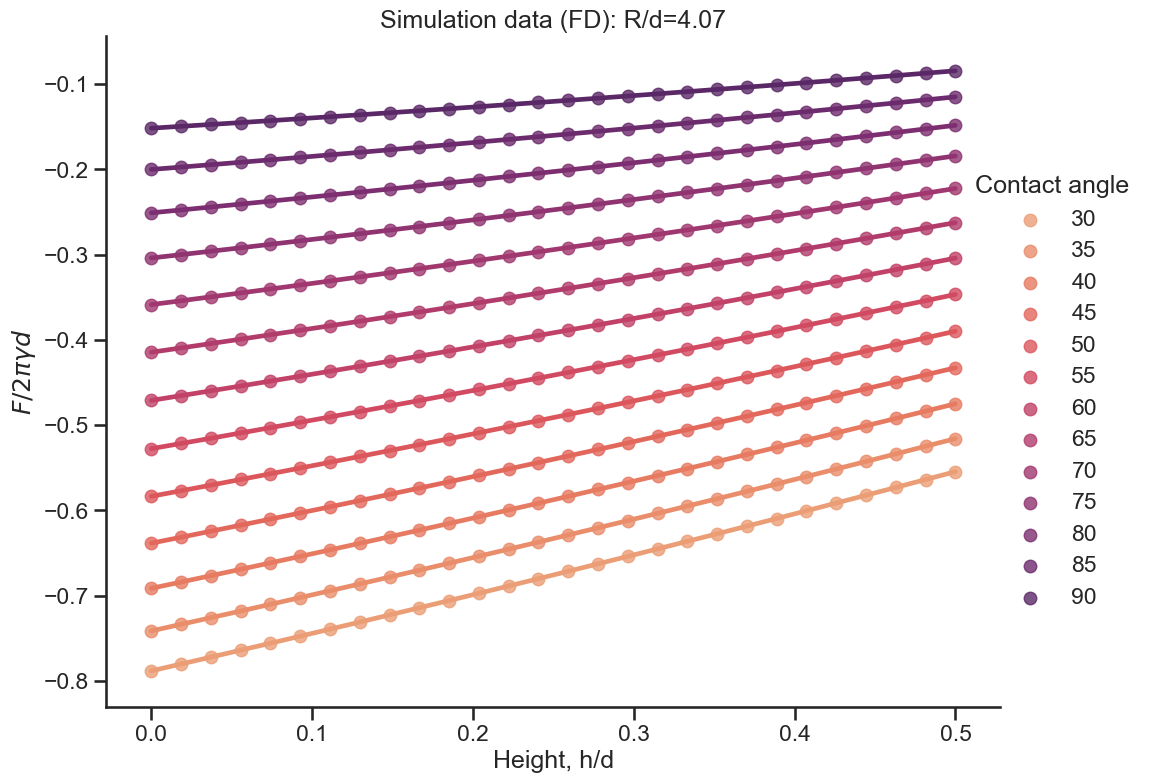

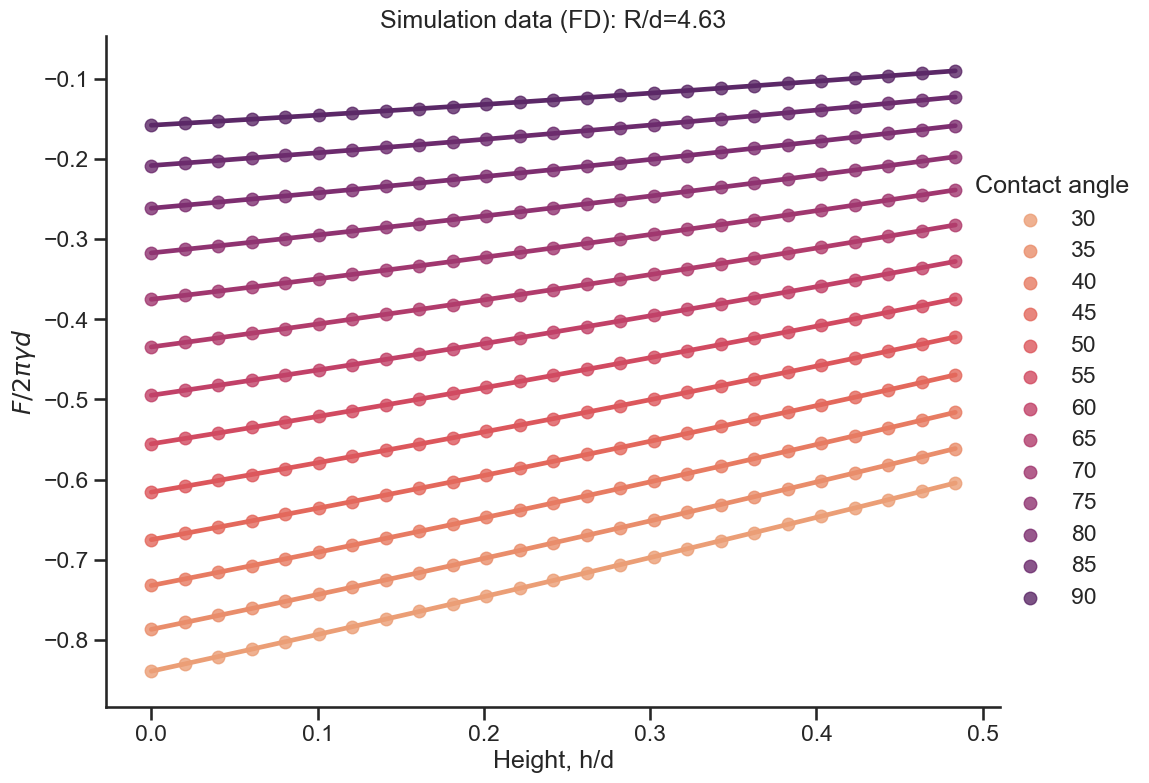

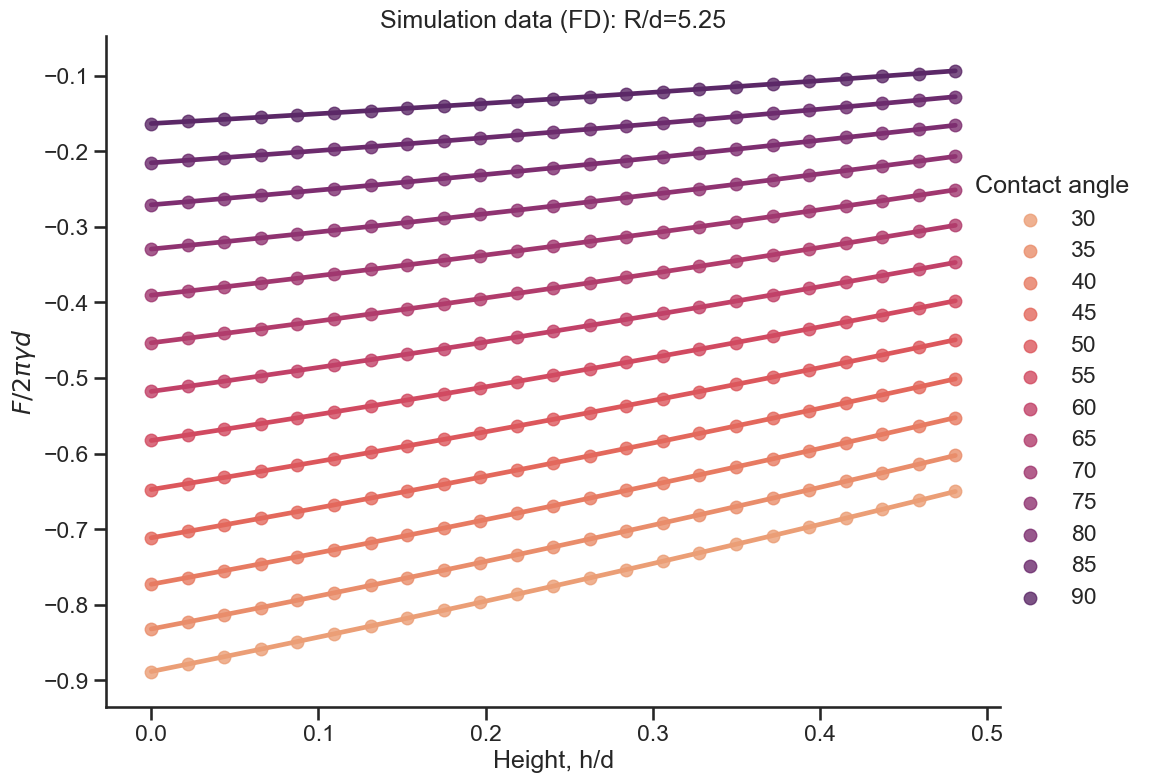

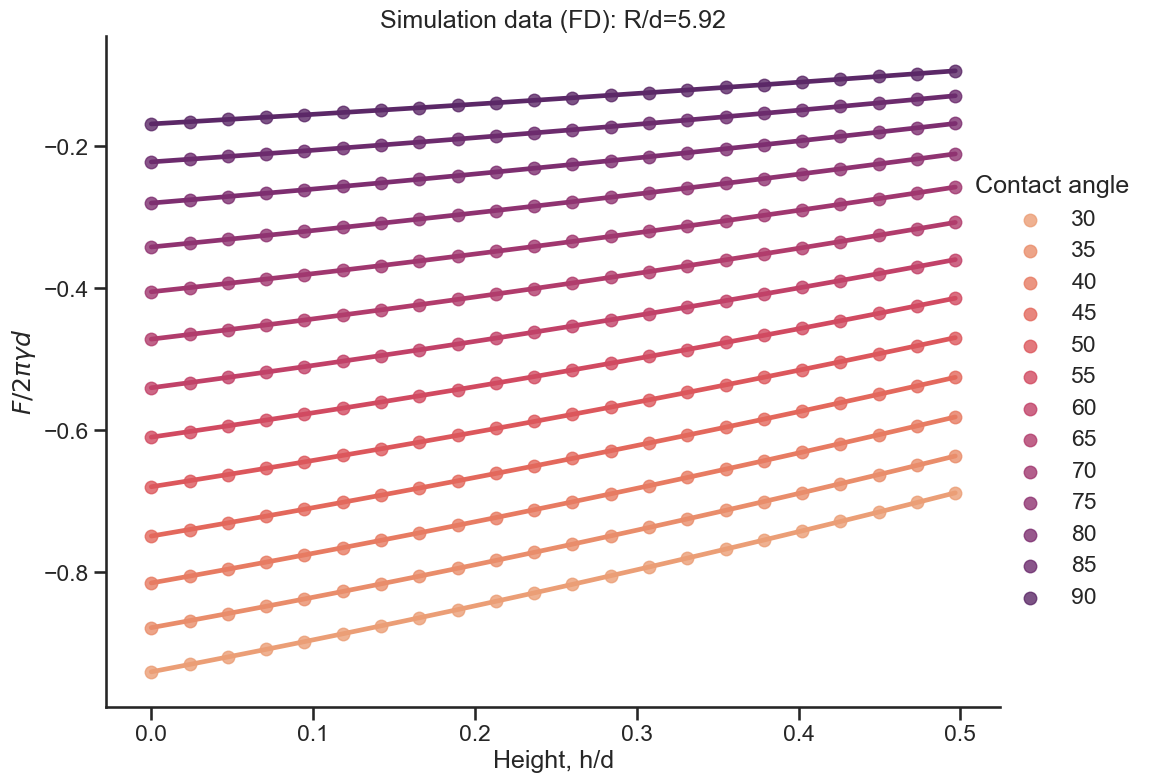

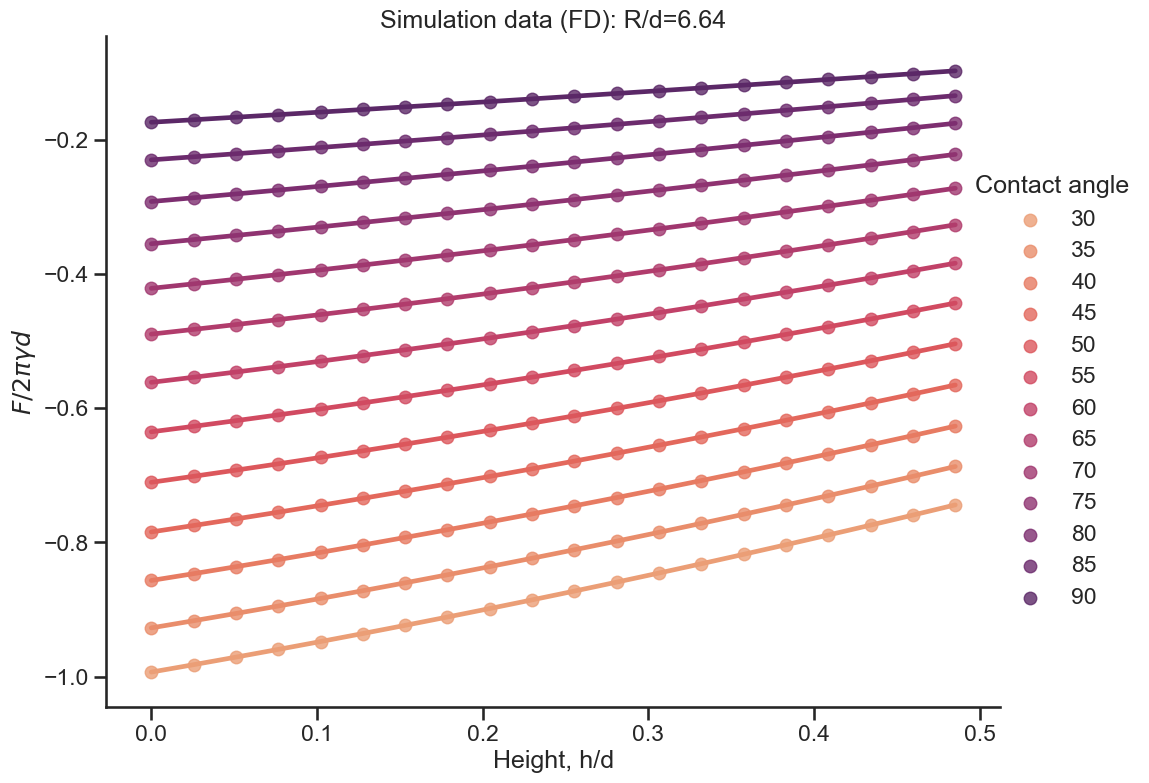

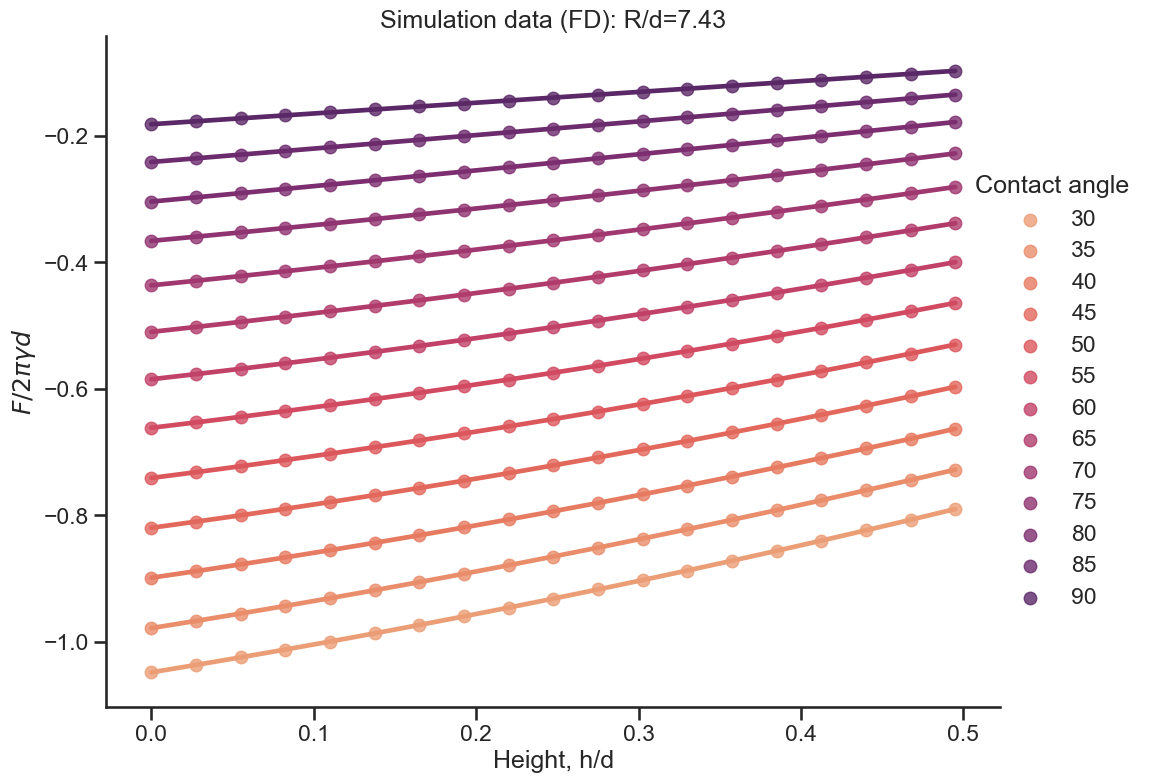

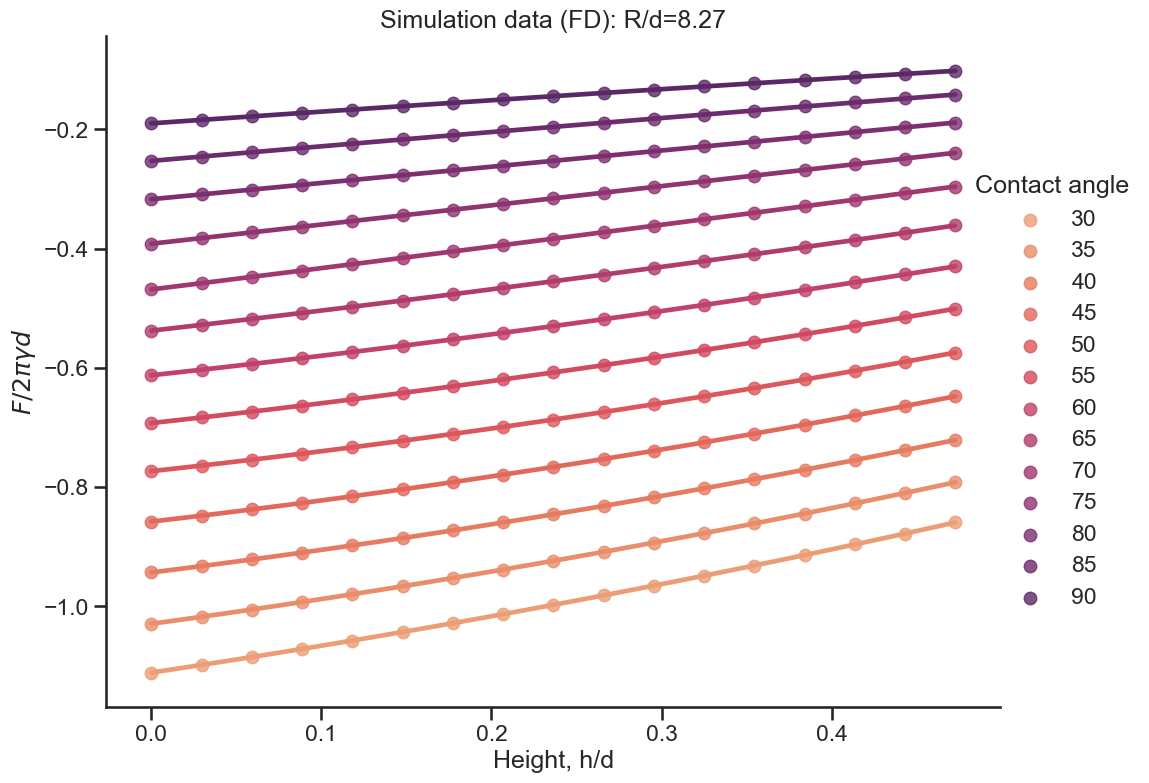

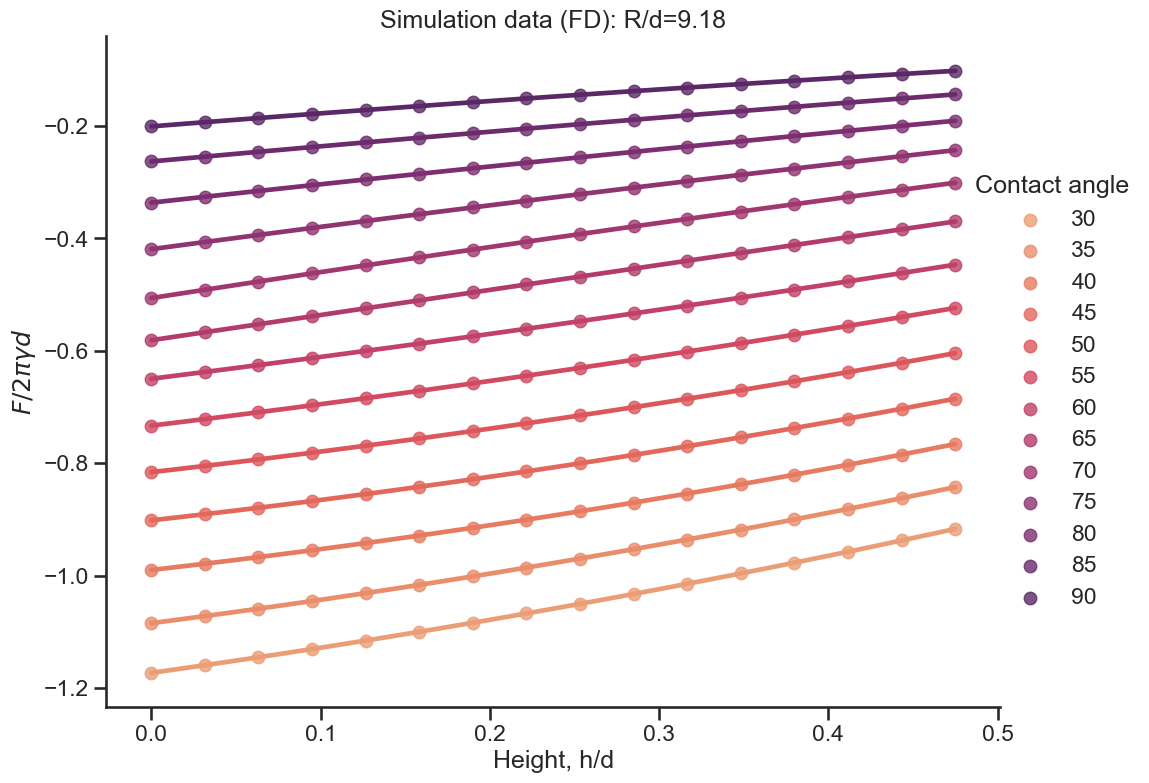

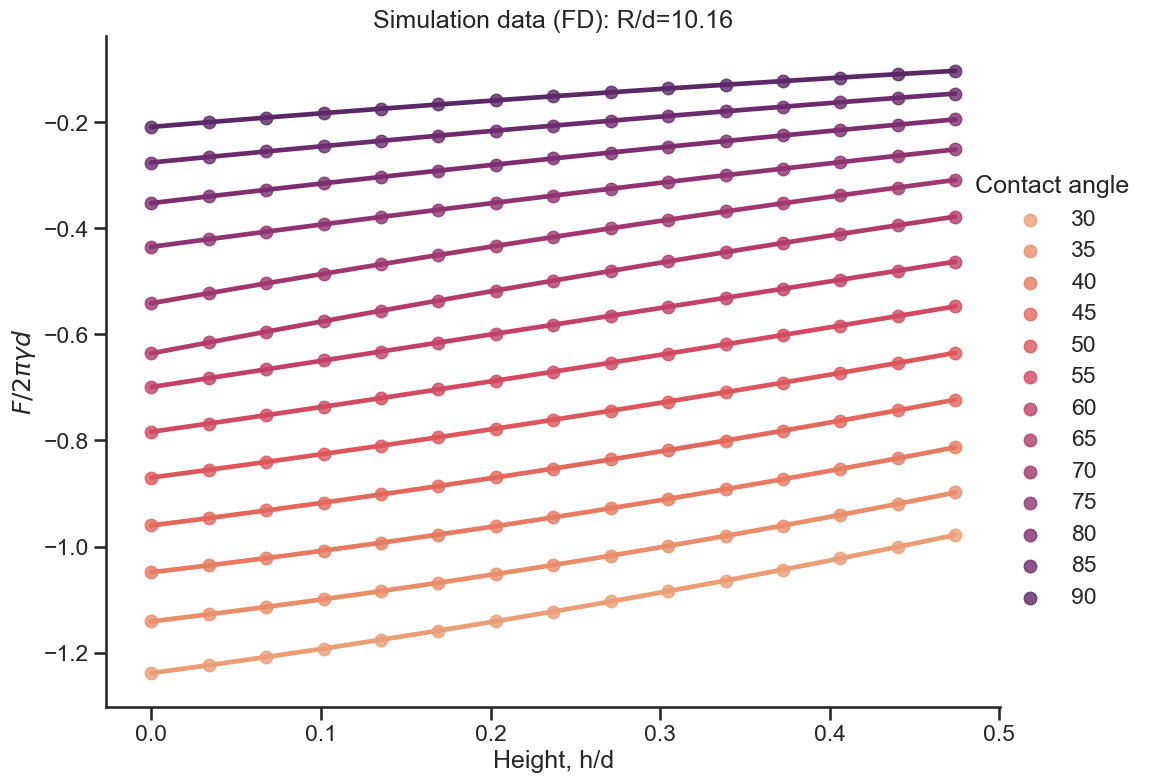

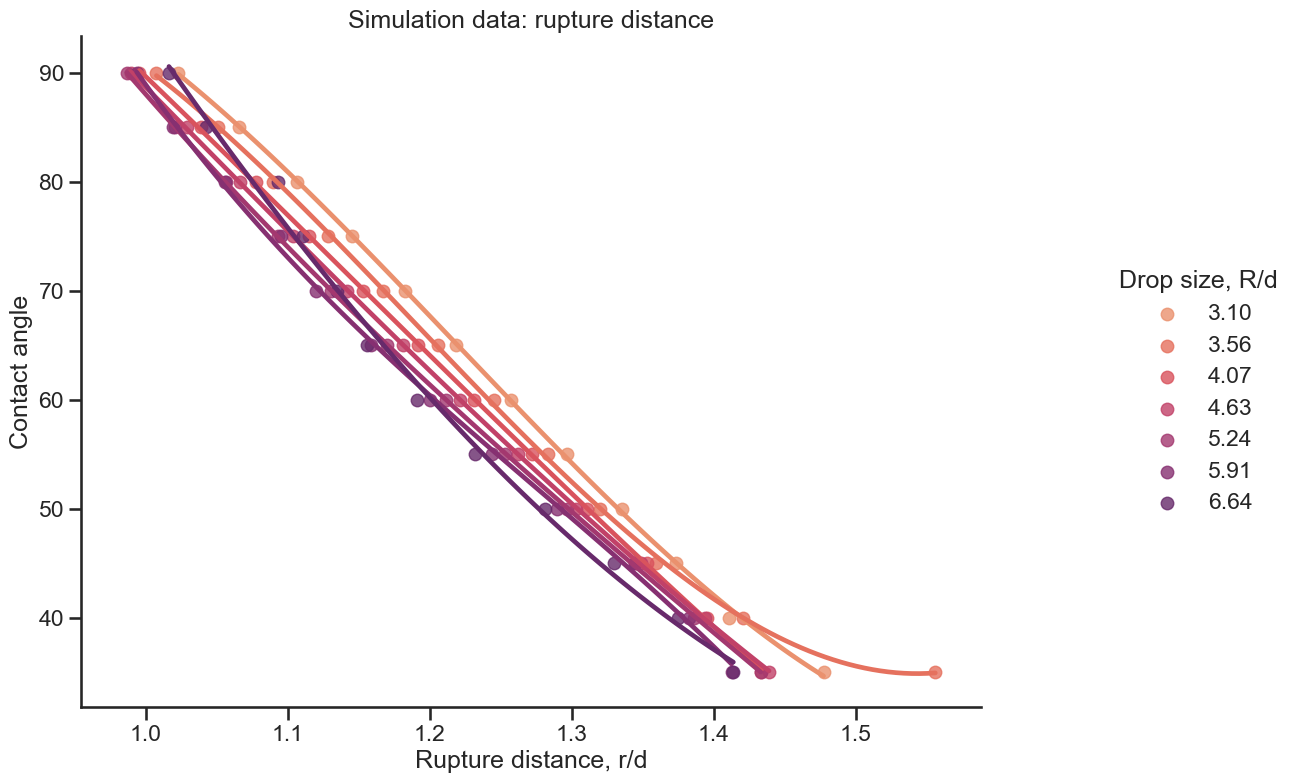

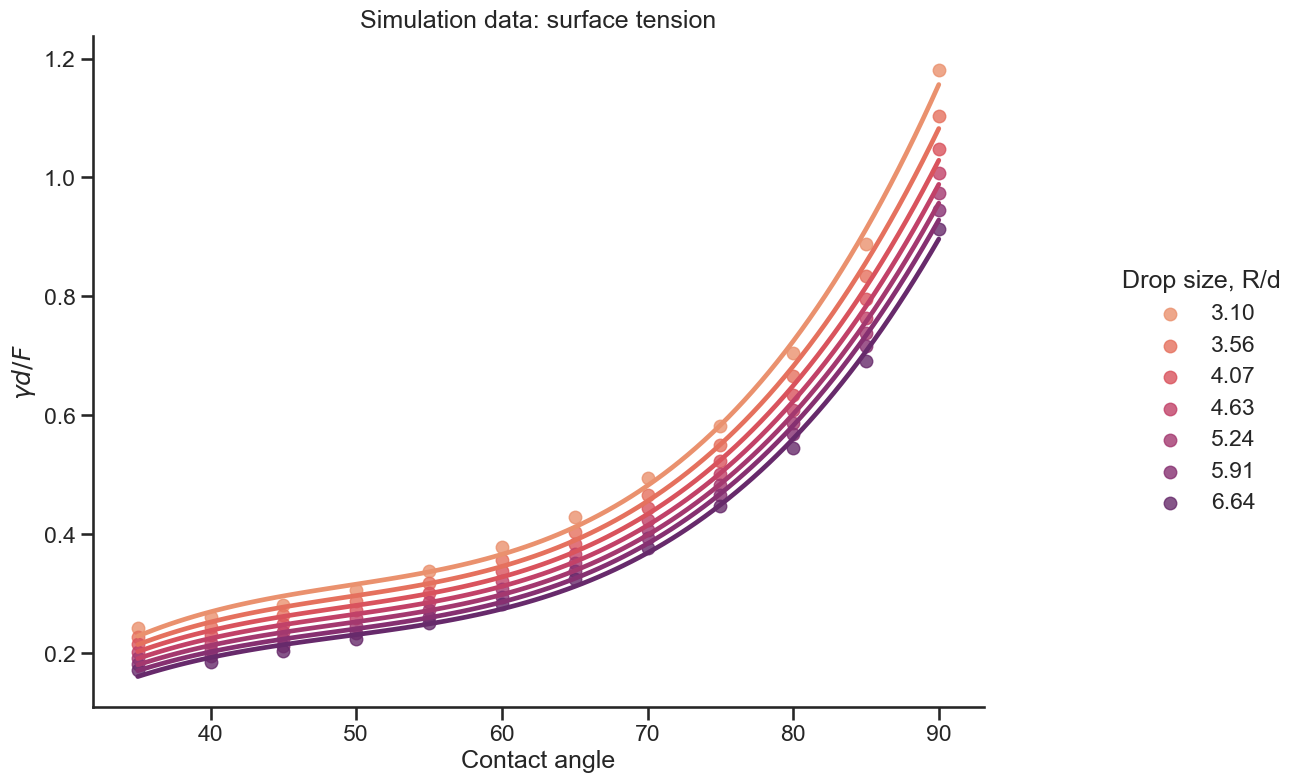

In [64]:
plt.close('all')

simu_folderpath = 'E:/Work/Surface Evolver/afm_pyramid/data/20220325_rfesp_np_fd/' #20220325_rfesp_np_fd

#combine simulation data for tip geometry
simu_df, simu_df_anal, fig_list = surfevol.combine_simul_dirs(simu_folderpath, 
                                                              fd_fit_order=2, plot=True)

#show plots below
for f in fig_list:
    display(f)
plt.close('all')

## Run Surface Tension code
Only works with classic Jupyter Notebook, not JupyterLab

In [50]:
%%javascript
Jupyter.notebook.execute_cells([8,10,12,14,16])

<IPython.core.display.Javascript object>

## JPK data raw files

In [51]:
jpk_file_paths, _ = QFileDialog.getOpenFileNames(caption='Select JPK data files') #JPK data (*.jpk,*.jpk-qi-data,*.jpk-force)
output_dir = QFileDialog.getExistingDirectory(caption='Select output data folder') #output folder
        
#separate image data and force data files
img_file_paths = []
fd_file_paths = []
for filepath in jpk_file_paths:
    file_ext = filepath.split('.')[-1]
    if file_ext in ['jpk', 'jpk-qi-data']:
        img_file_paths.append(filepath)
    elif file_ext in ['jpk-force']:
        fd_file_paths.append(filepath)
        
#make output directory
if output_dir == '':
        output_dir = os.path.dirname(jpk_file_paths[0]) + '/analysis' #default "analysis" folder
output_paths = []
for img_file_path in img_file_paths:
    file_name = os.path.basename(img_file_path)
    timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
    output_path = f'{output_dir}/{file_name}_results_{timestamp}'
    os.makedirs(output_path, exist_ok=True)
    output_paths.append(output_path)

print('Image data:\n', img_file_paths, '\nForce data:\n', fd_file_paths, '\nOutput folder:\n', output_paths)

Image data:
 ['E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/save_area3-2022.04.11-19.34.05.557.jpk'] 
Force data:
 ['E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.04.11-19.41.49.195.jpk-force', 'E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.04.11-19.43.18.265.jpk-force', 'E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.04.11-19.47.01.826.jpk-force', 'E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.04.11-19.49.31.807.jpk-force', 'E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.04.11-19.52.00.667.jpk-force'] 
Output folder:
 ['E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/analysis/save_area3-2022.04.11-19.34.05.557.jpk_results_220615-114017']


## AFM image

Image file: E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/save_area3-2022.04.11-19.34.05.557.jpk
Output folder: E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/analysis/save_area3-2022.04.11-19.34.05.557.jpk_results_220615-114017


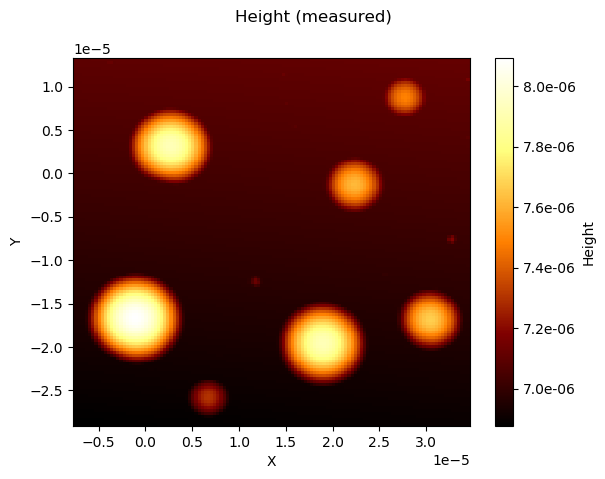

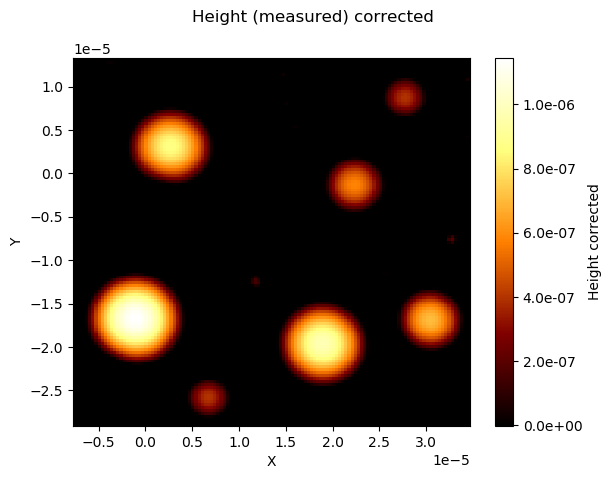

In [52]:
plt.close('all')
for img_file_path, output_path in zip(img_file_paths, output_paths):
    print('Image file:', img_file_path)
    print('Output folder:', output_path)
    afm_data, anal_data_h, fig_list =  wetting.get_afm_image(img_file_path, output_path, 
                                                             level_order=2, jump_tol=0.9)
    for fig in fig_list:
        display(fig)

plt.close('all')

## Get liquid drop properties

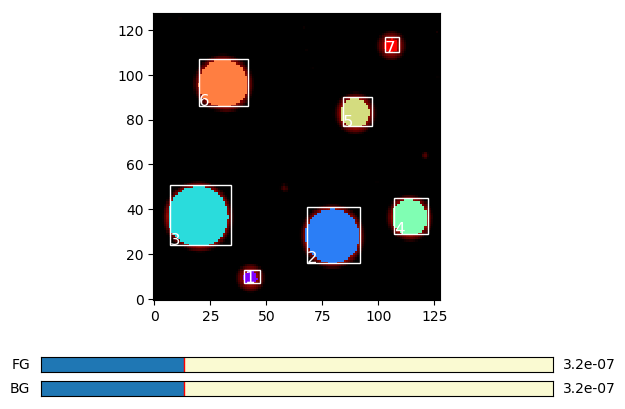

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
0      1   0.000008        0.000002  3.988622e-07    4.019028e-07   
1      2   0.000013        0.000005  9.719896e-07    9.783038e-07   
2      3   0.000013        0.000005  1.141323e-06    1.145861e-06   
3      4   0.000009        0.000004  7.092118e-07    7.104753e-07   
4      5   0.000009        0.000003  5.805882e-07    5.832220e-07   
5      6   0.000012        0.000005  8.681928e-07    8.685885e-07   
6      7   0.000007        0.000002  3.964712e-07    3.973481e-07   

         Volume    Volume raw  Drop contact angle             s       R/d  \
0  3.780835e-18  1.073992e-18           18.525208  9.664210e-07  6.131728   
1  3.749079e-17  3.300129e-17           22.335543  2.076245e-06  5.065321   
2  5.142646e-17  4.674654e-17           24.238115  2.306921e-06  4.657025   
3  1.447737e-17  1.099765e-17           22.401101  1.511937e-06  5.050114   
4  9.695226e-18  6.402257e-18           20.298652  1.322787e-06  5.586109   
5  2.799816e-17  2.390479e-17           21.824782  1.883708e-06  5.186885   
6  3.508735e-18  1.075857e-18           19.052663  9.426576e-07  5.958940   

                                            AFM file  
0  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  
1  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  
2  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  
3  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  
4  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  
5  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  
6  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...

In [53]:
plt.close('all')
#drop analysis of AFM data
drop_df, img_anal, fig_list = wetting.get_drop_prop(afm_data, anal_data_h, output_paths[0])
drop_df['AFM file'] = img_file_paths[0]
for fig in fig_list:
    display(fig)
display(drop_df)
plt.close('all')

## Analyze force distance curves

Force file: E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.04.11-19.41.49.195.jpk-force
jumpin distance 8.199548173775883e-07
Fit distance 3.257839203341346e-07
FD wetted length: 5.8396936256758e-07
energy 4 9.611758957039765e-15
Force file: E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.04.11-19.43.18.265.jpk-force
jumpin distance 5.987566993007668e-09
Fit distance 2.685626762634018e-07
FD wetted length: 4.5324057120291697e-07
energy 5 9.087651535543957e-16
Force file: E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.04.11-19.47.01.826.jpk-force
jumpin distance 6.039098007451453e-08
Fit distance 4.5850610033552884e-07
FD wetted length: 8.240046231909638e-07
energy 2 2.9541315458139047e-15
Force file: E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.04.11-19.49.31.807.jpk-force
jumpin distance 9.521602764974475e-07
Fit distance 4.5228133079716444e-07
FD we

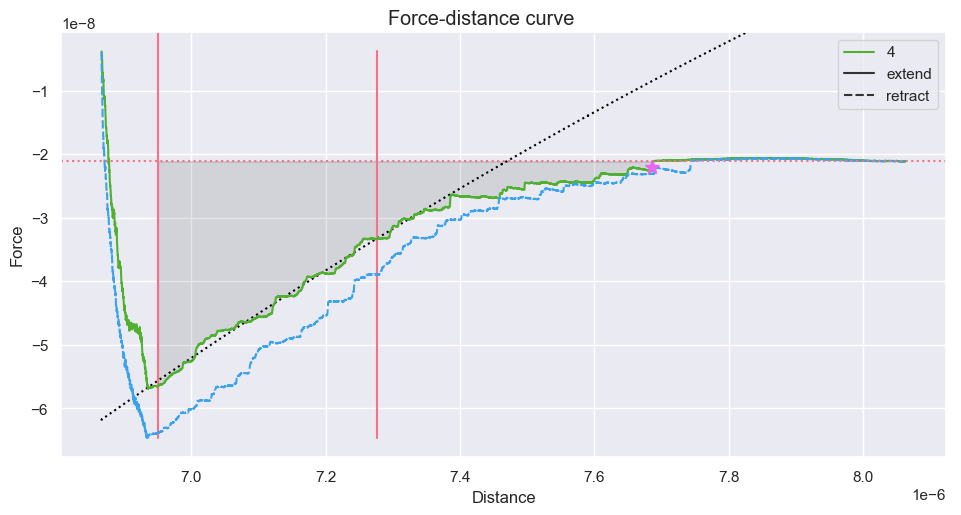

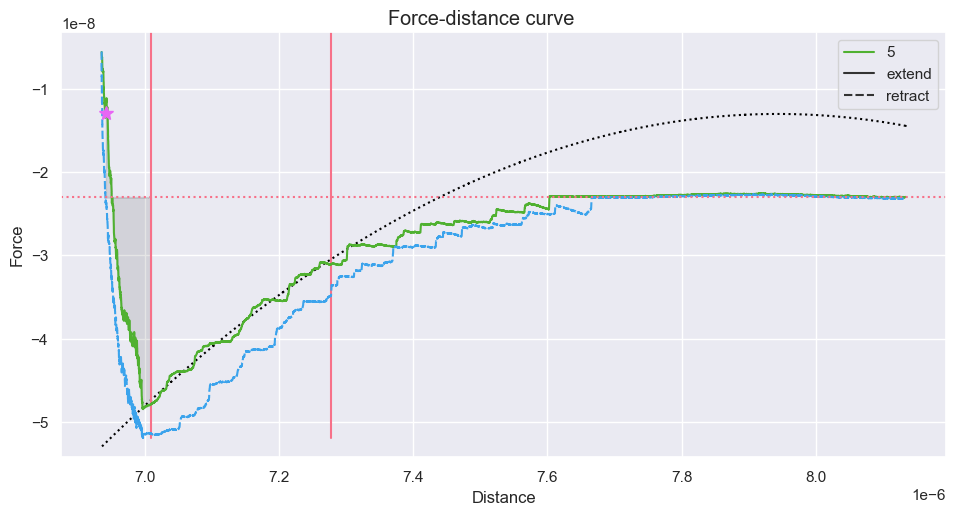

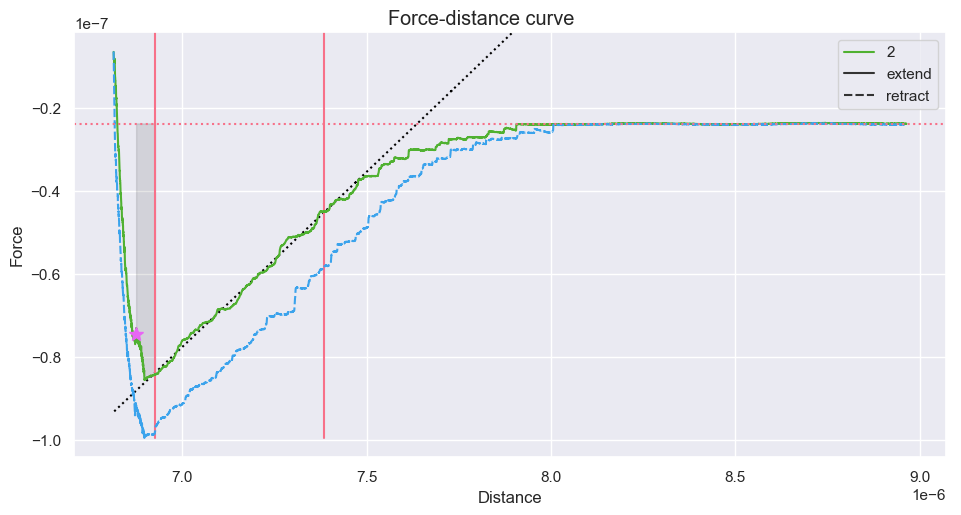

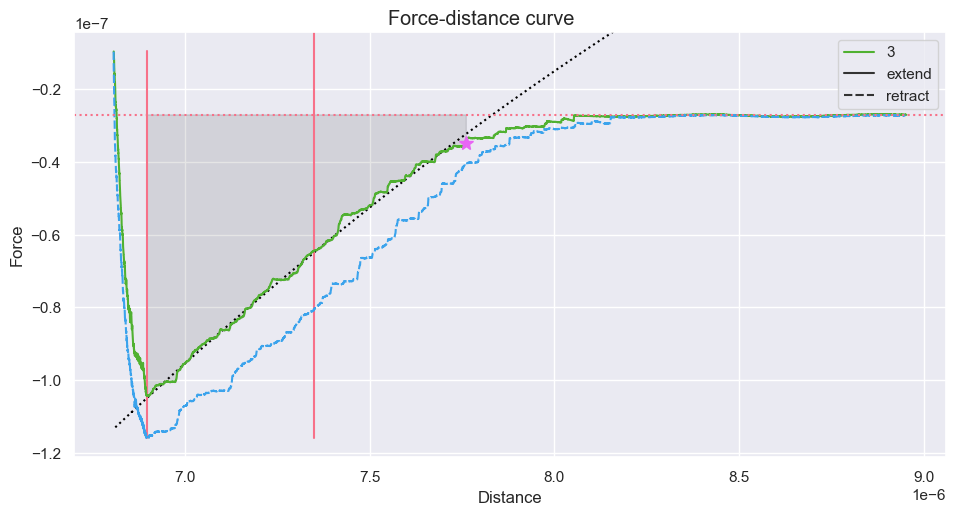

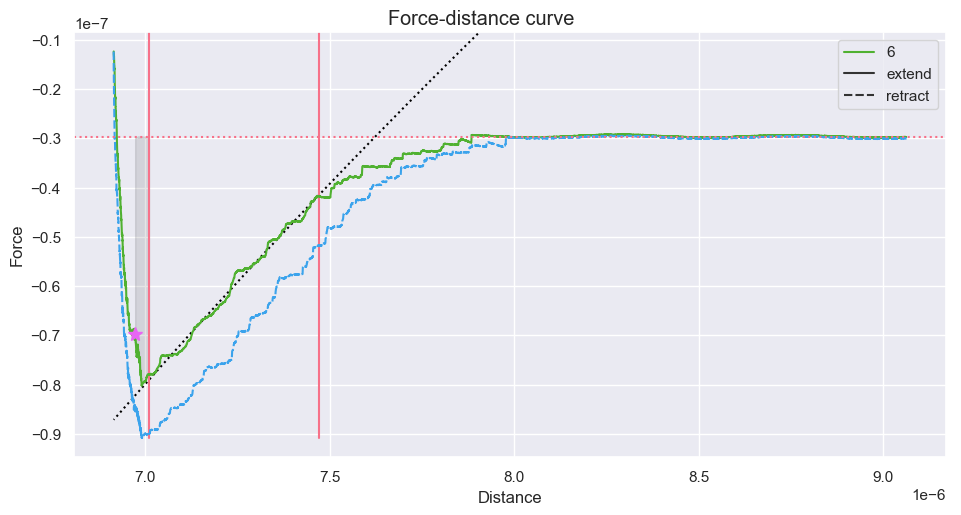

Label  Adhesion (FD)  Jumpin distance (FD)  Slope (FD)  Wetted length (FD)  \
0      4   3.579559e-08          8.199548e-07    0.068506        5.839694e-07   
1      5   2.547122e-08          5.987567e-09    0.062926        4.532406e-07   
2      2   6.156957e-08          6.039098e-08    0.084076        8.240046e-07   
3      3   7.712523e-08          9.521603e-07    0.088406        9.654821e-07   
4      6   5.041960e-08          5.782441e-08    0.081380        6.982066e-07   

   Fit distance (FD)  Adhesion energy (FD)  FD X position  FD Y position  \
0       3.257839e-07          9.611759e-15   3.040987e-05      -0.000017   
1       2.685627e-07          9.087652e-16   2.233020e-05      -0.000002   
2       4.585061e-07          2.954132e-15   1.907937e-05      -0.000020   
3       4.522813e-07          3.446163e-14  -9.263857e-07      -0.000017   
4       4.606520e-07          1.769024e-15   2.772450e-06       0.000002   

                                             FD file  
0  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  
1  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  
2  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  
3  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  
4  E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...

In [54]:
plt.close('all')
fd_drop_df, fdfit_dict, fddata_dict, fig_list = wetting.analyze_drop_fd(fd_file_paths, afm_data, img_anal,
                                                                        force_cycle = 'approach', fit_order = 2,
                                                                        output_path = output_paths[0])

for fig in fig_list:
    #fig = Image(fig_path, width=400, height=400)
    display(fig)
display(fd_drop_df)

## Droplet surface tension calculation

e:\work\afm\codes\venv\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

e:\work\afm\codes\venv\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

e:\work\afm\codes\venv\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



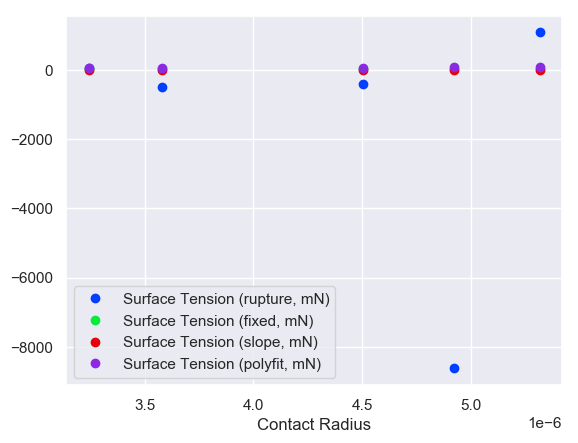

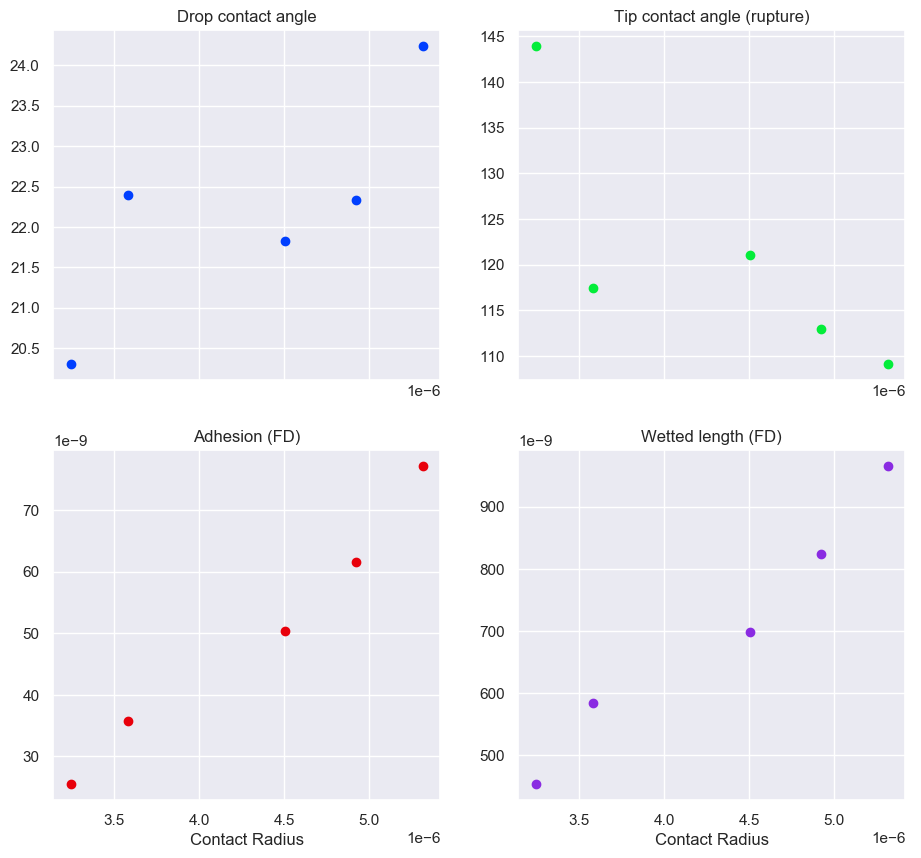

Curvature  Contact Radius    Max Height  Max Height raw        Volume  \
Label                                                                          
4       0.000009        0.000004  7.092118e-07    7.104753e-07  1.447737e-17   
5       0.000009        0.000003  5.805882e-07    5.832220e-07  9.695226e-18   
2       0.000013        0.000005  9.719896e-07    9.783038e-07  3.749079e-17   
3       0.000013        0.000005  1.141323e-06    1.145861e-06  5.142646e-17   
6       0.000012        0.000005  8.681928e-07    8.685885e-07  2.799816e-17   

         Volume raw  Drop contact angle         s       R/d  \
Label                                                         
4      1.099765e-17           22.401101  0.000002  5.050114   
5      6.402257e-18           20.298652  0.000001  5.586109   
2      3.300129e-17           22.335543  0.000002  5.065321   
3      4.674654e-17           24.238115  0.000002  4.657025   
6      2.390479e-17           21.824782  0.000002  5.186885   

                                                AFM file  ...  FD Y position  \
Label                                                     ...                  
4      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...      -0.000017   
5      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...      -0.000002   
2      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...      -0.000020   
3      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...      -0.000017   
6      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...       0.000002   

                                                 FD file  Simulation R/d  \
Label                                                                      
4      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...        5.246771   
5      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...        5.915195   
2      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...        5.246771   
3      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...        4.633466   
6      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...        5.246771   

       Surface Tension (rupture, mN)  Tip contact angle (rupture)  \
Label                                                               
4                        -504.784266                   117.397152   
5                          58.950825                   143.936896   
2                       -8622.262107                   112.938198   
3                        1079.006054                   109.082067   
6                        -403.876515                   121.017748   

       F_fit_actual  Surface Tension (fixed, mN)  Tip contact angle (fixed)  \
Label                                                                         
4          0.015914                    20.566759                       70.0   
5         -0.118444                    17.229219                       70.0   
2          0.001169                    25.811712                       70.0   
3         -0.009967                    28.662167                       70.0   
6          0.022885                    23.664399                       70.0   

      F_fit_fixed                                    Simulation file  
Label                                                                 
4       -0.390578  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
5       -0.405262  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
2       -0.390578  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3       -0.375231  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
6       -0.390578  E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[5 rows x 27 columns]

Curvature  Contact Radius    Max Height  Max Height raw        Volume  \
Label                                                                          
4       0.000009        0.000004  7.092118e-07    7.104753e-07  1.447737e-17   
5       0.000009        0.000003  5.805882e-07    5.832220e-07  9.695226e-18   
2       0.000013        0.000005  9.719896e-07    9.783038e-07  3.749079e-17   
3       0.000013        0.000005  1.141323e-06    1.145861e-06  5.142646e-17   
6       0.000012        0.000005  8.681928e-07    8.685885e-07  2.799816e-17   

         Volume raw  Drop contact angle         s       R/d  \
Label                                                         
4      1.099765e-17           22.401101  0.000002  5.050114   
5      6.402257e-18           20.298652  0.000001  5.586109   
2      3.300129e-17           22.335543  0.000002  5.065321   
3      4.674654e-17           24.238115  0.000002  4.657025   
6      2.390479e-17           21.824782  0.000002  5.186885   

                                                AFM file  ...  \
Label                                                     ...   
4      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...   
5      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...   
2      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...   
3      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...   
6      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...   

       Wetted length (FD)  Fit distance (FD)  Adhesion energy (FD)  \
Label                                                                
4            5.839694e-07       3.257839e-07          9.611759e-15   
5            4.532406e-07       2.685627e-07          9.087652e-16   
2            8.240046e-07       4.585061e-07          2.954132e-15   
3            9.654821e-07       4.522813e-07          3.446163e-14   
6            6.982066e-07       4.606520e-07          1.769024e-15   

       FD X position  FD Y position  \
Label                                 
4       3.040987e-05      -0.000017   
5       2.233020e-05      -0.000002   
2       1.907937e-05      -0.000020   
3      -9.263857e-07      -0.000017   
6       2.772450e-06       0.000002   

                                                 FD file      yd/F  \
Label                                                                
4      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000035   
5      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000031   
2      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000016   
3      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000028   
6      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  0.000018   

       Surface Tension FD (mN) Simulation contact angle  \
Label                                                     
4                     0.001749            -22043.947239   
5                     0.001362            -17831.424401   
2                     0.000995            -33106.070887   
3                     0.001865            -36431.845000   
6                     0.001035            -31031.372123   

                                         Simulation file  
Label                                                     
4      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
5      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
2      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
6      E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[5 rows x 23 columns]

Curvature  Contact Radius    Max Height  Max Height raw        Volume  \
Label                                                                          
4       0.000009        0.000004  7.092118e-07    7.104753e-07  1.447737e-17   
5       0.000009        0.000003  5.805882e-07    5.832220e-07  9.695226e-18   
2       0.000013        0.000005  9.719896e-07    9.783038e-07  3.749079e-17   
3       0.000013        0.000005  1.141323e-06    1.145861e-06  5.142646e-17   
6       0.000012        0.000005  8.681928e-07    8.685885e-07  2.799816e-17   

         Volume raw  Drop contact angle         s       R/d  \
Label                                                         
4      1.099765e-17           22.401101  0.000002  5.050114   
5      6.402257e-18           20.298652  0.000001  5.586109   
2      3.300129e-17           22.335543  0.000002  5.065321   
3      4.674654e-17           24.238115  0.000002  4.657025   
6      2.390479e-17           21.824782  0.000002  5.186885   

                                                AFM file  ...  \
Label                                                     ...   
4      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...   
5      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...   
2      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...   
3      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...   
6      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...  ...   

       Fit distance (FD)  Adhesion energy (FD)  FD X position  FD Y position  \
Label                                                                          
4           3.257839e-07          9.611759e-15   3.040987e-05      -0.000017   
5           2.685627e-07          9.087652e-16   2.233020e-05      -0.000002   
2           4.585061e-07          2.954132e-15   1.907937e-05      -0.000020   
3           4.522813e-07          3.446163e-14  -9.263857e-07      -0.000017   
6           4.606520e-07          1.769024e-15   2.772450e-06       0.000002   

                                                 FD file  Simulation R/d  \
Label                                                                      
4      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...        5.246771   
5      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...        5.915195   
2      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...        5.246771   
3      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...        4.633466   
6      E:/Work/AFM/20220411 mineral oil_RFESPA_pdmsbr...        5.246771   

       Surface Tension (error min, mN)  Tip contact angle (error min)  \
Label                                                                   
4                            55.734687                           90.0   
5                            48.808049                           90.0   
2                            69.377294                           90.0   
3                            76.066940                           90.0   
6                            64.350471                           90.0   

      RMSE (error min)  R square (error min)  
Label                                         
4         5.030412e-09             -0.581340  
5         5.056952e-09             -1.786618  
2         7.142711e-09             -0.095442  
3         8.858005e-09              0.040063  
6         7.481087e-09             -0.750712  

[5 rows x 24 columns]

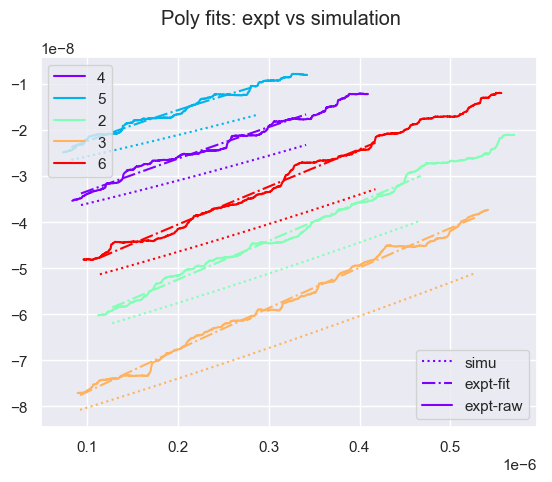

In [55]:
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 70 #Set fixed value to calculate its corresponsing surface tension

#combine droplet image and force result data
afm_df = drop_df.set_index('Label').join(fd_drop_df.set_index('Label'), how='right')

#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension3(afm_df, simu_df_anal,contact_angle,
                                          fd_file_paths, output_paths[0], True)

#output_df_filtered = output_df.dropna(subset=['FD file'])


# calculate surface tension from slopes of linear FD fitting
output_df2 = wetting.get_surface_tension2(afm_df, simu_df,
                                         tolerance=0.5,
                                         fd_file_paths=fd_file_paths,
                                         file_path=output_paths[0], save=True)
#output_df_filtered2 = output_df2[output_df['FD file'] != '']

# calculate surface tension by complete FD fitting using 2nd order poly approximation
output_df3, fig = wetting.get_surface_tension4(afm_df, simu_df, fdfit_dict,fddata_dict,
                                              file_path=output_paths[0], save=True)

ax = output_df.plot(x='Contact Radius', y=['Surface Tension (rupture, mN)','Surface Tension (fixed, mN)'],
                             marker = "o", ls="")
ax.plot(output_df2['Contact Radius'],output_df2['Surface Tension FD (mN)'],
        label="Surface Tension (slope, mN)", marker = "o", ls="")
ax.plot(output_df3['Contact Radius'],output_df3['Surface Tension (error min, mN)'],
        label="Surface Tension (polyfit, mN)", marker = "o", ls="")
ax.legend()

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig1 = ax.get_figure()
display(fig1)
fig1.savefig(f'{output_paths[0]}/surface_tension.png', bbox_inches = 'tight',
             transparent = False)

plot_vars = ['Drop contact angle','Tip contact angle (rupture)',
             'Adhesion (FD)', 'Wetted length (FD)']
ax = output_df.plot(x='Contact Radius', y=plot_vars,title = plot_vars,
                             marker = "o", ls="", subplots=True, layout=(2,2), figsize=(11,10),
                             legend=False)
#number formatting
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig2 = ax[0][0].get_figure()
display(fig2)
fig2.savefig(f'{output_paths[0]}/other_results.png', bbox_inches = 'tight',
             transparent = False)

display(output_df)
display(output_df2)
display(output_df3)
display(fig)
fig.savefig(f'{output_paths[0]}/polyfit_result.png', bbox_inches = 'tight',
            transparent = False)
plt.close('all')

## Combine results from different folders

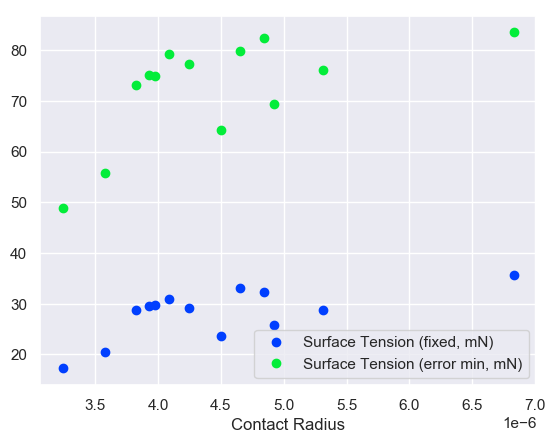

Label  Curvature  Contact Radius    Max Height  Max Height raw  \
0      2   0.000009        0.000004  1.073369e-06    1.076767e-06   
1      1   0.000008        0.000004  1.021454e-06    1.023122e-06   
2      3   0.000008        0.000004  1.015496e-06    1.014697e-06   
3      4   0.000008        0.000004  9.628567e-07    9.664714e-07   
0      2   0.000009        0.000004  1.073369e-06    1.076767e-06   
1      1   0.000008        0.000004  1.021454e-06    1.023122e-06   
2      3   0.000008        0.000004  1.015496e-06    1.014697e-06   
3      4   0.000008        0.000004  9.628567e-07    9.664714e-07   
0      2   0.000009        0.000004  1.073369e-06    1.076767e-06   
1      1   0.000008        0.000004  1.021454e-06    1.023122e-06   
2      3   0.000008        0.000004  1.015496e-06    1.014697e-06   
3      4   0.000008        0.000004  9.628567e-07    9.664714e-07   
0      4   0.000007        0.000004  1.227081e-06    1.239609e-06   
1      3   0.000008        0.000005  1.519429e-06    1.526714e-06   
2      2   0.000008        0.000005  1.426263e-06    1.433475e-06   
3      1   0.000012        0.000007  2.231322e-06    2.231950e-06   
0      4   0.000007        0.000004  1.227081e-06    1.239609e-06   
1      3   0.000008        0.000005  1.519429e-06    1.526714e-06   
2      2   0.000008        0.000005  1.426263e-06    1.433475e-06   
3      1   0.000012        0.000007  2.231322e-06    2.231950e-06   
0      4   0.000007        0.000004  1.227081e-06    1.239609e-06   
1      3   0.000008        0.000005  1.519429e-06    1.526714e-06   
2      2   0.000008        0.000005  1.426263e-06    1.433475e-06   
3      1   0.000012        0.000007  2.231322e-06    2.231950e-06   
0      4   0.000009        0.000004  7.092118e-07    7.104753e-07   
1      5   0.000009        0.000003  5.805882e-07    5.832220e-07   
2      2   0.000013        0.000005  9.719896e-07    9.783038e-07   
3      3   0.000013        0.000005  1.141323e-06    1.145861e-06   
4      6   0.000012        0.000005  8.681928e-07    8.685885e-07   
0      4   0.000009        0.000004  7.092118e-07    7.104753e-07   
1      5   0.000009        0.000003  5.805882e-07    5.832220e-07   
2      2   0.000013        0.000005  9.719896e-07    9.783038e-07   
3      3   0.000013        0.000005  1.141323e-06    1.145861e-06   
4      6   0.000012        0.000005  8.681928e-07    8.685885e-07   
0      4   0.000009        0.000004  7.092118e-07    7.104753e-07   
1      5   0.000009        0.000003  5.805882e-07    5.832220e-07   
2      2   0.000013        0.000005  9.719896e-07    9.783038e-07   
3      3   0.000013        0.000005  1.141323e-06    1.145861e-06   
4      6   0.000012        0.000005  8.681928e-07    8.685885e-07   

         Volume    Volume raw  Drop contact angle         s       R/d  ...  \
0  3.103678e-17  2.741127e-17           28.377177  0.000002  3.955274  ...   
1  2.529101e-17  2.206269e-17           29.166230  0.000002  3.843702  ...   
2  2.574934e-17  2.267039e-17           28.663441  0.000002  3.914101  ...   
3  2.255112e-17  1.932356e-17           28.285948  0.000002  3.968567  ...   
0  3.103678e-17  2.741127e-17           28.377177  0.000002  3.955274  ...   
1  2.529101e-17  2.206269e-17           29.166230  0.000002  3.843702  ...   
2  2.574934e-17  2.267039e-17           28.663441  0.000002  3.914101  ...   
3  2.255112e-17  1.932356e-17           28.285948  0.000002  3.968567  ...   
0  3.103678e-17  2.741127e-17           28.377177  0.000002  3.955274  ...   
1  2.529101e-17  2.206269e-17           29.166230  0.000002  3.843702  ...   
2  2.574934e-17  2.267039e-17           28.663441  0.000002  3.914101  ...   
3  2.255112e-17  1.932356e-17           28.285948  0.000002  3.968567  ...   
0  3.315678e-17  2.334213e-17           33.427008  0.000002  3.330322  ...   
1  5.777043e-17  4.762844e-17           34.850556  0.000002  3.186077  ...   
2  5.004018e-17  3.936435e-17           34.077935  0.000002  3.262914  .

In [57]:
plt.cla()
plt.clf()
plt.close('all')
folder_paths = get_directories("Select analysis result folder (containing output Excel file)")
summary_df = wetting.combine_result_spreadsheets(folder_paths)
summary_df = summary_df[summary_df['FD file'] != '']

surf_ten_label = [#'Surface Tension (rupture, mN)', 
                  'Surface Tension (fixed, mN)',
                  #'Surface Tension FD (mN)', 
                  'Surface Tension (error min, mN)']
#summary_df = summary_df[summary_df[surf_ten_label] != 0]
#summary_df.replace(0, np.nan, inplace=True)
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
summary_df.to_excel(f'{output_dir}/summary_data_all_{timestamp}.xlsx', index=None)

ax = summary_df.plot(x='Contact Radius', 
                     y=surf_ten_label,
                     marker = "o", ls="")

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig3 = ax.get_figure()
fig3.savefig(f'{output_dir}/summary_plot_all_{timestamp}.png', bbox_inches = 'tight',
             transparent = False)
display(fig3)
display(summary_df)
plt.close('all')

## Combine multiple FD curves

In [37]:
plt.close('all')
# combine multiple fd curves
output_path = ''
fd_file_paths, _ = QFileDialog.getOpenFileNames()
wetting.combine_fd(fd_file_paths, zero_shift=True, 
                   output_dir=output_path,save=False)
#wetting.get_adhesion_from_fd(fd_file_paths)

## Optional codes

In [ ]:
# calculate contact angle from fd curve
label = 5 #INPUT
label_df = drop_df[drop_df['Label']==label]
s = label_df['s'].iloc[0]
R = round(label_df['R/s'].iloc[0])
contact_angle = wetting.get_contact_angle(fd_file_paths[0], simu_df,
                                         R, s, fit_index=5000)

